Ch3 p74

Repeat p73, but this time use every other point (x = 0.1, 1.6, 2.5, ...). Do you get the same results? Repeat again but with the other half of the points.

In [2]:
import numpy as np
from tabulate import tabulate
from naf.incf import least_squares_polynomial, eval_poly
import matplotlib.pyplot as plt

In [11]:
x = np.array([0.1,1.1,1.6,2.4,2.5,4.1,5.2,6.1,6.6,7.1,8.2,9.1,9.4,
              11.1,11.4,12.2,13.2,14.1,15.6,16.1,17.6,17.9,19.1,20.0])
y = np.array([1.9,7.9,24.9,24.9,34.9,42.7,29.7,49.8,36.1,23.7,13.0,20.5,
              -3.1,-13.0,-28.7,-39.5,-48.6,-40.2,-51.6,-30.5,-34.6,-16.4,-13.4,-1.1])
pts = np.column_stack((x,y))

x1 = np.empty(int(x.shape[0]/2))
y1 = np.empty(int(y.shape[0]/2))

c = 0
for i in range(x.shape[0]):
    if i%2 == 0:
        x1[c] = x[i]
        y1[c] = y[i]
        c+=1
        
pts1 = np.column_stack((x1, y1))

x2 = np.empty(int(x.shape[0]/2))
y2 = np.empty(int(y.shape[0]/2))

c = 0
for i in range(x.shape[0]):
    if i%2 == 1:
        x2[c] = x[i]
        y2[c] = y[i]
        c+=1
        
pts2 = np.column_stack((x2, y2))

In [12]:
print(tabulate(pts1))
print(tabulate(pts2))

----  -----
 0.1    1.9
 1.6   24.9
 2.5   34.9
 5.2   29.7
 6.6   36.1
 8.2   13
 9.4   -3.1
11.4  -28.7
13.2  -48.6
15.6  -51.6
17.6  -34.6
19.1  -13.4
----  -----
----  -----
 1.1    7.9
 2.4   24.9
 4.1   42.7
 6.1   49.8
 7.1   23.7
 9.1   20.5
11.1  -13
12.2  -39.5
14.1  -40.2
16.1  -30.5
17.9  -16.4
20     -1.1
----  -----


In [13]:
N1 = x1.shape[0]

for i in range(1,N1-1):
    a = least_squares_polynomial(pts1, i)
    yintp = eval_poly(a, x)
    esqd = sum((yintp-y)**2)
    ssqd = esqd/(N1-i-1)
    print(i, ssqd)

1 1184.0621561904086
2 1321.8389846254697
3 282.5821487555233
4 332.9805451526131
5 306.9146241965644
6 369.9449239927854
7 481.77861733778025
8 631.1488585966185
9 2890.107334364855
10 223770.8097988928


In [14]:
N2 = x2.shape[0]

for i in range(1,N2-1):
    a = least_squares_polynomial(pts2, i)
    yintp = eval_poly(a, x)
    esqd = sum((yintp-y)**2)
    ssqd = esqd/(N2-i-1)
    print(i, ssqd)

1 1175.0140400095227
2 1313.9602569066406
3 293.86868871048085
4 453.8096474885391
5 309.60285630861887
6 375.6015210323234
7 569.4961925951982
8 1406.980302084424
9 5729.741110734419
10 2265526.315613365


In [16]:
a15 = least_squares_polynomial(pts1, 5)
y15 = eval_poly(a15, x1)

a25 = least_squares_polynomial(pts2, 5)
y25 = eval_poly(a25, x2)

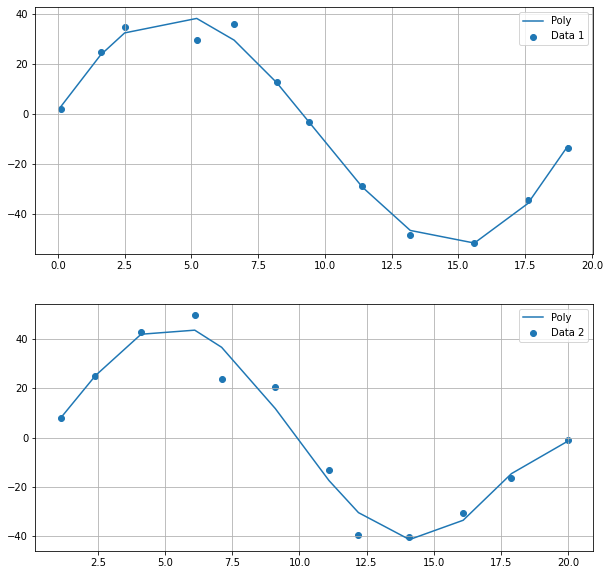

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))

ax1.scatter(x1,y1, label="Data 1")
ax1.plot(x1, y15, label='Poly')

ax2.scatter(x2,y2,label="Data 2")
ax2.plot(x2, y25, label='Poly')

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()
plt.show()